In [42]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p


In [43]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [44]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



In [45]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim=256

In [46]:
#Autoencoder Arch-1
xInp=Input(shape=(28,28),name="img")
inp=Flatten(input_shape=(28, 28), name='InputLayer')(xInp)

encodedOut=Dense(encodingDim,activation='sigmoid')(inp)

Encoder1=Model(xInp,encodedOut,name='encoder')


decodedOut=Dense(784,activation='sigmoid')(encodedOut)
out=Reshape((28,28))(decodedOut)
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder1=Model(xInp,out,name='AutoencoderA1')
Autoencoder1.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder1.compile(optimizer, loss='mse',metrics=['accuracy'])
ae1history=Autoencoder1.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
 reshape_5 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

In [47]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr=Autoencoder1.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr[0])

#print('\nEvaluation of model on validation data:')
valErr=Autoencoder1.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr=Autoencoder1.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 760us/step - loss: 0.0015 - accuracy: 0.3828
Train Data: 0.0014981088461354375
3795/3795 [==============================] - 3s 751us/step - loss: 0.0019 - accuracy: 0.3802
Validation Data: 0.001885102246887982
3795/3795 [==============================] - 3s 750us/step - loss: 0.0019 - accuracy: 0.3801
Test Data: 0.0019417020957916975


356/356 [==============================] - 0s 892us/step


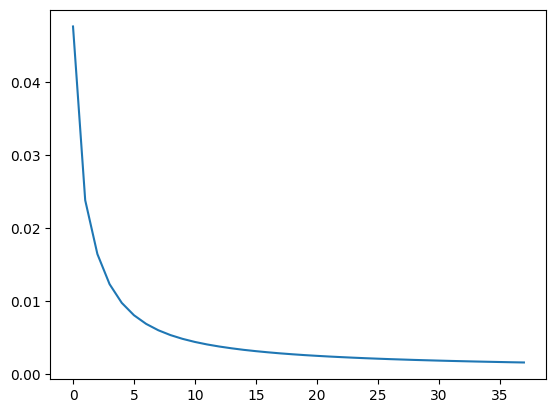

In [48]:
'''visualization-Task2-d'''
trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
plt.plot(ae1history.history['loss'])

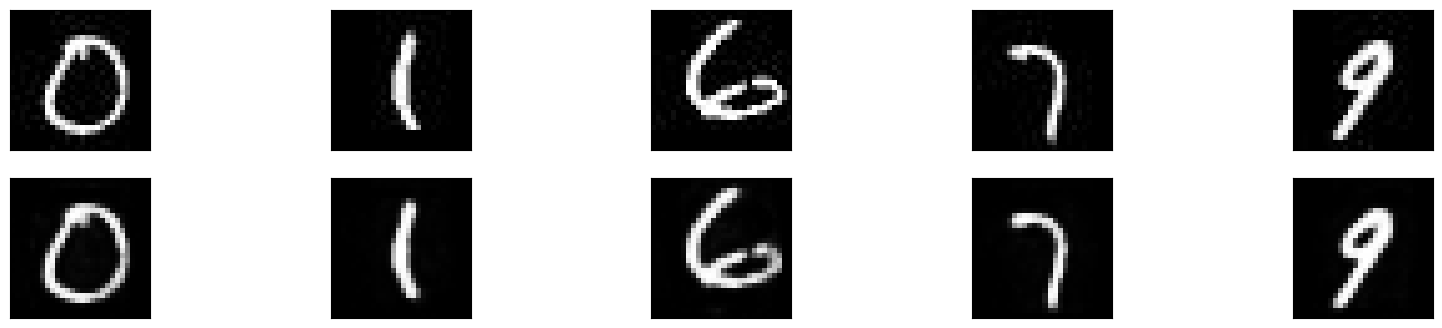

In [49]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


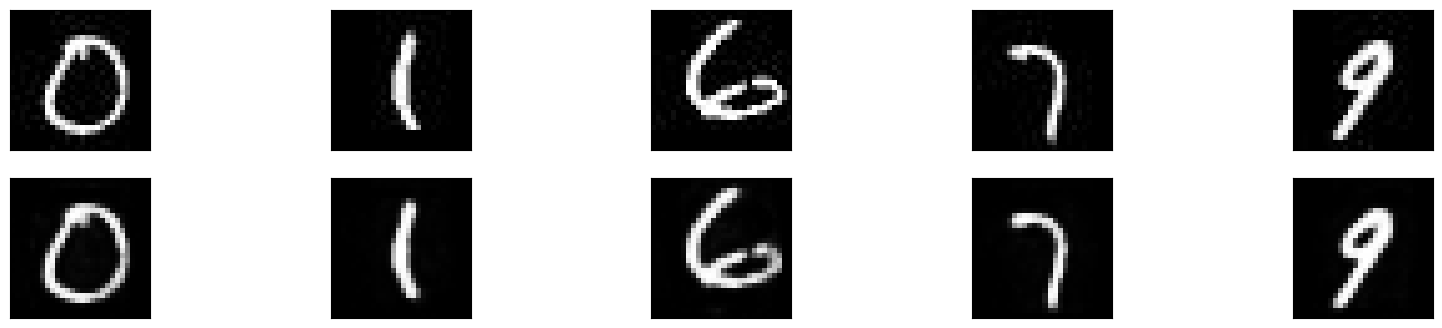

In [114]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [141]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights = Autoencoder1.layers[2].get_weights()[0]
print(weights.shape)
print(weights)

(784, 128)
[[ 0.05379932 -0.00471682 -0.00166921 ...  0.03374618  0.07913709
  -0.02719868]
 [-0.05886663  0.07904799 -0.03114292 ... -0.05644067  0.01118864
  -0.01602008]
 [ 0.0696265   0.08089209 -0.04265348 ... -0.07946933  0.01224279
  -0.04185612]
 ...
 [-0.02878525 -0.05755094 -0.06834822 ...  0.06324799 -0.05920504
   0.04187544]
 [-0.05790605 -0.01429669  0.0607636  ...  0.08057722 -0.07855268
  -0.02503293]
 [ 0.06971275 -0.00773629 -0.00066928 ...  0.08041174  0.01539238
   0.05107469]]


In [147]:
wt=[]
for w in weights.T:
    wt.append(w.reshape(28,28))
wt=np.array(wt)
wt.shape

(128, 28, 28)

In [ ]:
n = 9
plt.figure(figsize=(25, 25))
for i in range(n):
    k = np.random.randint(0, 256)
    ax = plt.subplot(3, 3, i+1)
    plt.title("Node no: "+str(k))
    plt.imshow(w1[k], cmap='gray')
    plt.savefig("/content/drive/MyDrive/autoencoder_output/weight_img5"+str(np.random.randint(1, 100000))+".png")
plt.show

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')

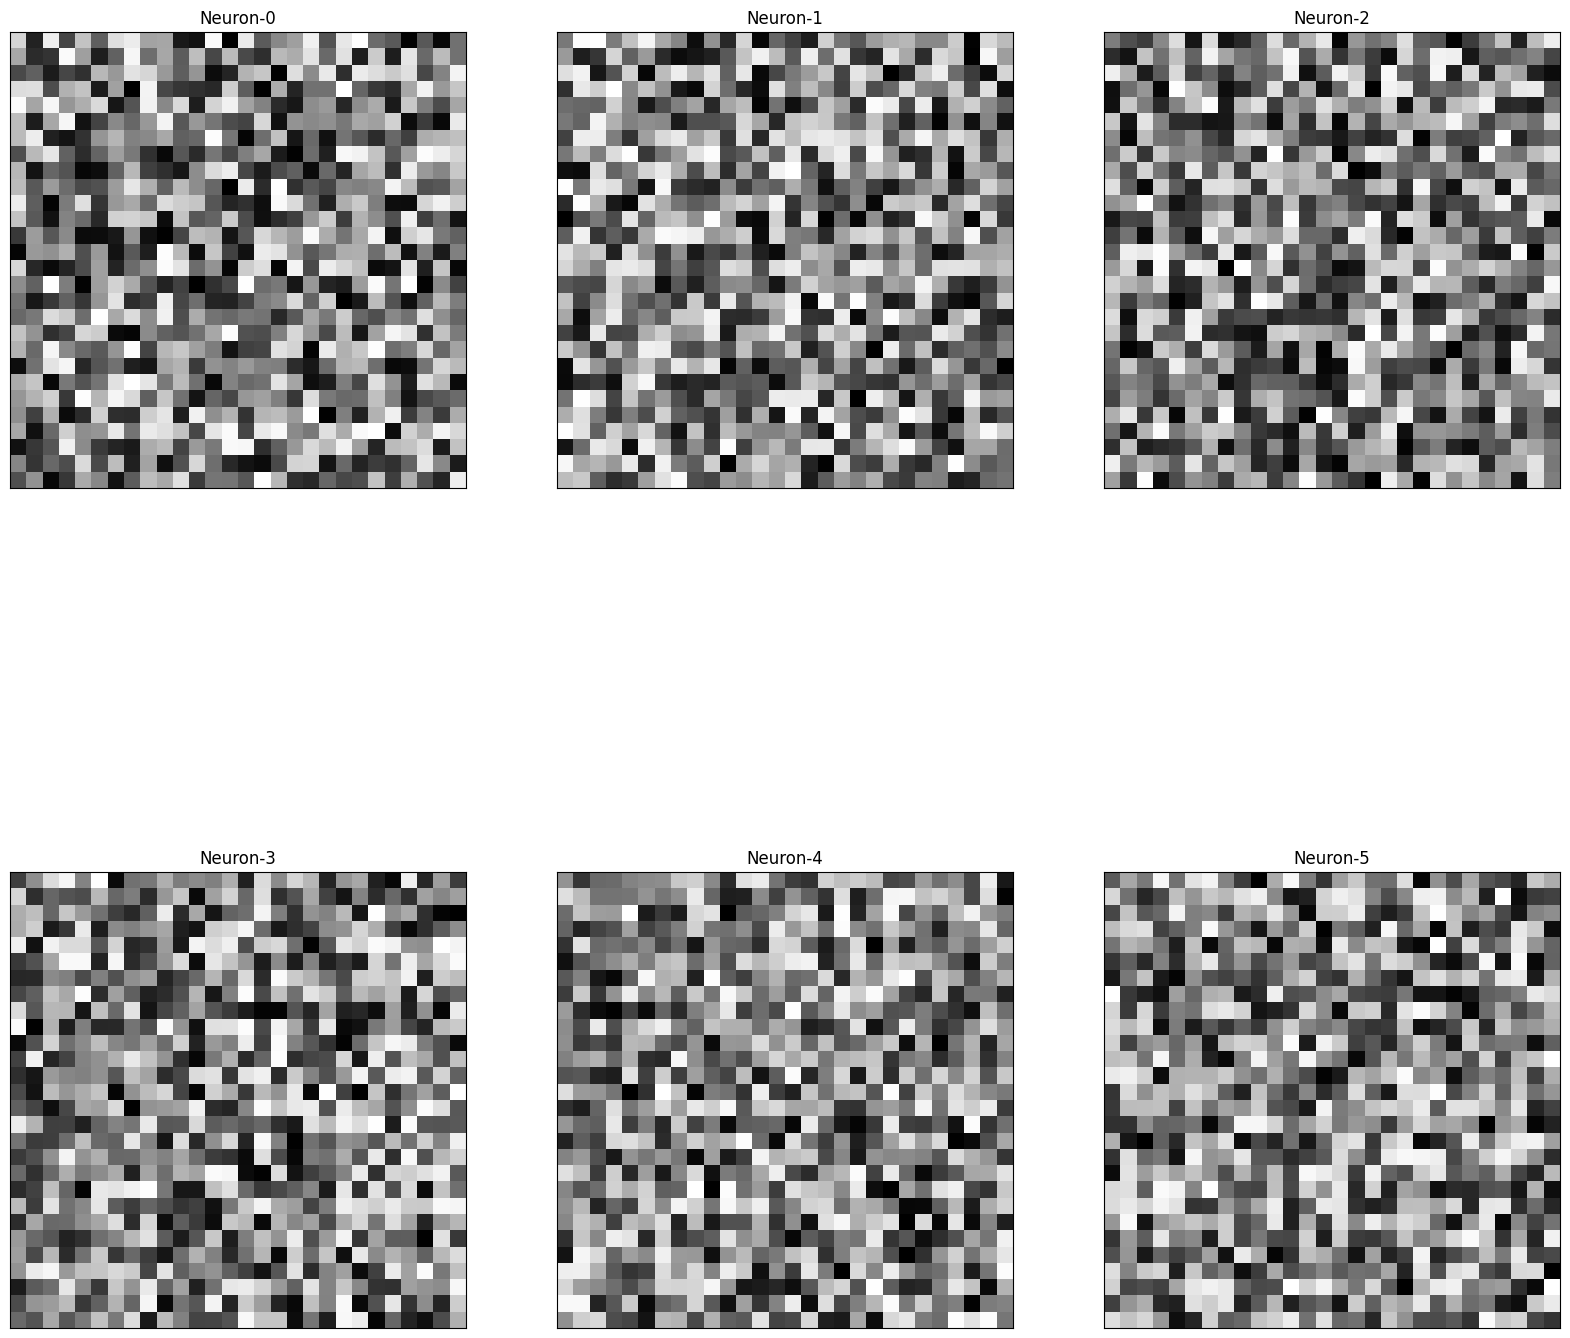

In [188]:
n=6
plt.figure(figsize=(20,20))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights.T[i].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

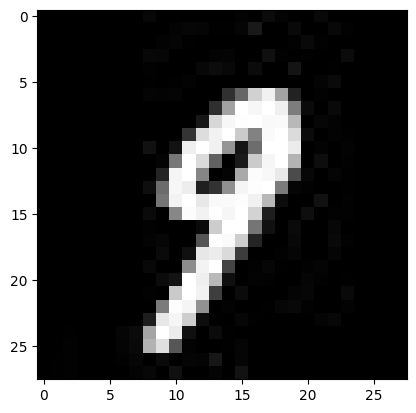

In [189]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

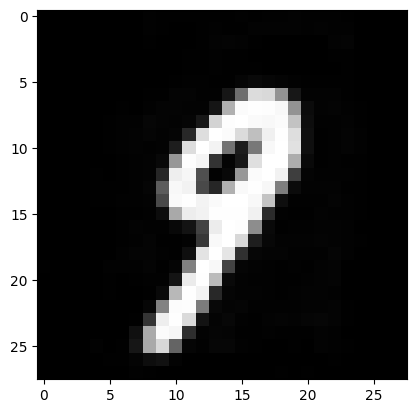

In [51]:
plt.imshow(trainReconstruct[0].reshape(28,28),cmap='gray')

In [52]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode=Encoder1.predict(Input_train_Dataset)
valEncode=Encoder1.predict(Input_val_Dataset)
testEncode=Encoder1.predict(Input_test_Dataset)

'''Fcnn'''
model = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit = model.fit(x = trainEncode, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode,  Output_val), validation_batch_size=1)

model.save('/Users/vds/Downloads/modelAssign4/ae256.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae256.pckl','wb')
p.dump(model_fit.history,f)
f.close()




119/119 [==============================] - 0s 755us/step
Epoch 1/10000
356/356 [==============================] - 9s 17ms/step - loss: 0.4335 - accuracy: 0.8396 - val_loss: 0.0983 - val_accuracy: 0.9689
Epoch 2/10000
356/356 [==============================] - 6s 17ms/step - loss: 0.1187 - accuracy: 0.9631 - val_loss: 0.1247 - val_accuracy: 0.9578
Epoch 3/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1040 - accuracy: 0.9657 - val_loss: 0.0805 - val_accuracy: 0.9731
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0929 - accuracy: 0.9697 - val_loss: 0.0896 - val_accuracy: 0.9718
Epoch 5/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0898 - accuracy: 0.9709 - val_loss: 0.1066 - val_accuracy: 0.9631
Epoch 6/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0903 - accuracy: 0.9689 - val_loss: 0.0872 - val_accuracy: 0.9673
Epoch 7/10000
356/356 [==============================] - 6s 16ms/st

In [53]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainEncode,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valEncode, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testEncode, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testEncode, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=tf.math.confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)


Evaluation of model on train data:
11385/11385 [==============================] - 11s 929us/step - loss: 0.0079 - accuracy: 0.9971
['loss', 'accuracy']
[0.00792756024748087, 0.9971014261245728]

Evaluation of model on validation data:
3795/3795 [==============================] - 5s 1ms/step - loss: 0.0574 - accuracy: 0.9845
['loss', 'accuracy']
[0.05742500722408295, 0.9844532012939453]

Evaluation of model on test data:
3795/3795 [==============================] - 4s 1ms/step - loss: 0.0798 - accuracy: 0.9816
['loss', 'accuracy']
[0.07981640100479126, 0.9815546870231628]

Predictions for test data:
3795/3795 [==============================] - 4s 1ms/step
[4 4 4 ... 1 1 1]
tf.Tensor(
[[747   1   5   1   5]
 [  0 752   3   3   1]
 [  3   1 751   0   4]
 [  1   5   4 737  12]
 [  4   3   0  14 738]], shape=(5, 5), dtype=int32)


In [72]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [73]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val

In [74]:
#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim2=128

In [75]:
#Autoencoder Arch-1
xInp2=Input(shape=(28,28),name="img")
inp2=Flatten(input_shape=(28, 28), name='InputLayer')(xInp2)

encodedOut2=Dense(encodingDim2,activation='sigmoid')(inp2)

Encoder2=Model(xInp2,encodedOut2,name='encoder')


decodedOut2=Dense(784,activation='sigmoid')(encodedOut2)
out2=Reshape((28,28))(decodedOut2)
optimizer2=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder2=Model(xInp2,out2,name='AutoencoderA1')
Autoencoder2.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder2.compile(optimizer2, loss='mse',metrics=['accuracy'])
ae2history=Autoencoder2.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 784)               101136    
                                                                 
 reshape_8 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

356/356 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.3750 - val_loss: 0.0027 - val_accuracy: 0.3707
Epoch 50: early stopping


In [76]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr2=Autoencoder2.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr2[0])

#print('\nEvaluation of model on validation data:')
valErr2=Autoencoder2.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr2[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr2=Autoencoder2.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr2[0])


Average reconstruction Loss :
11385/11385 [==============================] - 10s 867us/step - loss: 0.0022 - accuracy: 0.3744
Train Data: 0.002222404582425952
3795/3795 [==============================] - 3s 862us/step - loss: 0.0027 - accuracy: 0.3707
Validation Data: 0.002676707925274968
3795/3795 [==============================] - 3s 741us/step - loss: 0.0027 - accuracy: 0.3720
Test Data: 0.0027492456138134003


356/356 [==============================] - 0s 849us/step


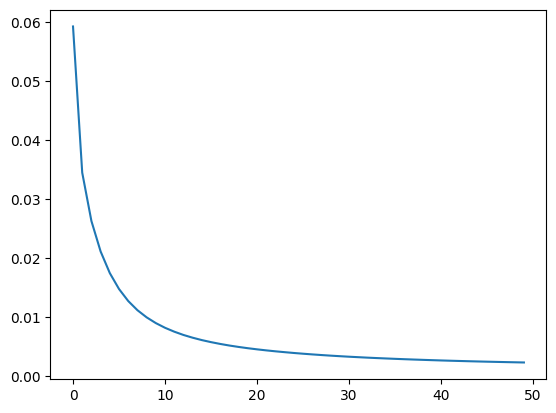

In [77]:
'''visualization-Task2-d'''
trainReconstruct2=Autoencoder2.predict(Input_train_Dataset)
plt.plot(ae2history.history['loss'])

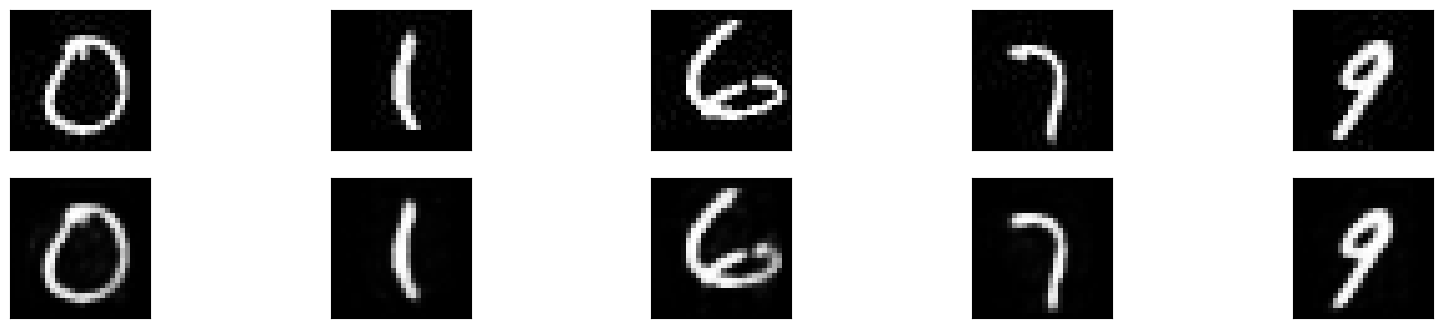

In [78]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [79]:
trainEncode2.shape

(11385, 128)

In [80]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode2=Encoder2.predict(Input_train_Dataset)
valEncode2=Encoder2.predict(Input_val_Dataset)
testEncode2=Encoder2.predict(Input_test_Dataset)

#Fcnn
model2 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit2 = model2.fit(x = trainEncode2, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode2,  Output_val), validation_batch_size=1)

model2.save('/Users/vds/Downloads/modelAssign4/ae128.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae128.pckl','wb')
p.dump(model_fit2.history,f)
f.close()

119/119 [==============================] - 0s 1ms/step
Epoch 1/10000
356/356 [==============================] - 7s 18ms/step - loss: 0.5135 - accuracy: 0.8097 - val_loss: 0.1168 - val_accuracy: 0.9623
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1414 - accuracy: 0.9545 - val_loss: 0.1244 - val_accuracy: 0.9599
Epoch 3/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1221 - accuracy: 0.9618 - val_loss: 0.1087 - val_accuracy: 0.9679
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1148 - accuracy: 0.9601 - val_loss: 0.0984 - val_accuracy: 0.9673
Epoch 5/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1002 - accuracy: 0.9651 - val_loss: 0.1310 - val_accuracy: 0.9573
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1004 - accuracy: 0.9657 - val_loss: 0.1015 - val_accuracy: 0.9676
Epoch 7/10000
356/356 [==============================] - 6s 16ms/step

In [81]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc2=model2.evaluate(x=trainEncode2,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(trainAcc2)

print('\nEvaluation of model on validation data:')
valAcc2=model2.evaluate(x=valEncode2, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(valAcc2)

print('\nEvaluation of model on test data:')
testAcc2=model2.evaluate(x=testEncode2, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(testAcc2)

print('\nPredictions for test data:')
testProb2=model2.predict(testEncode2, batch_size=1, verbose="auto", callbacks=None)
pred2=np.argmax(testProb2,axis=1)
print(pred2)


Evaluation of model on train data:
11385/11385 [==============================] - 15s 1ms/step - loss: 0.0092 - accuracy: 0.9969
['loss', 'accuracy']
[0.009199501015245914, 0.9969257712364197]

Evaluation of model on validation data:
3795/3795 [==============================] - 4s 1ms/step - loss: 0.0745 - accuracy: 0.9805
['loss', 'accuracy']
[0.07453024387359619, 0.9805006384849548]

Evaluation of model on test data:
3795/3795 [==============================] - 5s 1ms/step - loss: 0.0793 - accuracy: 0.9805
['loss', 'accuracy']
[0.07926156371831894, 0.9805006384849548]

Predictions for test data:
3795/3795 [==============================] - 3s 817us/step
[4 4 4 ... 1 1 1]


In [82]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix2=tf.math.confusion_matrix(Output_test,pred2)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix2)

tf.Tensor(
[[753   1   4   0   1]
 [  1 753   1   3   1]
 [  7   4 747   0   1]
 [  2   4   1 738  14]
 [  8   6   0  15 730]], shape=(5, 5), dtype=int32)


In [83]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [84]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

In [85]:
#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim3=64

In [86]:
#Autoencoder Arch-1
xInp3=Input(shape=(28,28),name="img")
inp3=Flatten(input_shape=(28, 28), name='InputLayer')(xInp3)

encodedOut3=Dense(encodingDim3,activation='sigmoid')(inp3)

Encoder3=Model(xInp3,encodedOut3,name='encoder')


decodedOut3=Dense(784,activation='sigmoid')(encodedOut3)
out3=Reshape((28,28))(decodedOut3)
optimizer3=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder3=Model(xInp3,out3,name='AutoencoderA1')
Autoencoder3.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder3.compile(optimizer3, loss='mse',metrics=['accuracy'])
ae3history=Autoencoder3.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 784)               50960     
                                                                 
 reshape_9 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

356/356 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.3407 - val_loss: 0.0085 - val_accuracy: 0.3380
Epoch 51/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0080 - accuracy: 0.3416 - val_loss: 0.0083 - val_accuracy: 0.3399
Epoch 52/1000
356/356 [==============================] - 1s 4ms/step - loss: 0.0079 - accuracy: 0.3421 - val_loss: 0.0082 - val_accuracy: 0.3386
Epoch 53/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0078 - accuracy: 0.3425 - val_loss: 0.0081 - val_accuracy: 0.3400
Epoch 54/1000
356/356 [==============================] - 2s 4ms/step - loss: 0.0077 - accuracy: 0.3429 - val_loss: 0.0080 - val_accuracy: 0.3398
Epoch 55/1000
356/356 [==============================] - 2s 6ms/step - loss: 0.0075 - accuracy: 0.3432 - val_loss: 0.0078 - val_accuracy: 0.3428
Epoch 56/1000
356/356 [==============================] - 1s 4ms/step - loss: 0.0074 - accuracy: 0.3441 - val_loss: 0.0077 - val_accuracy: 0.3424

In [87]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr3=Autoencoder3.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr3[0])

#print('\nEvaluation of model on validation data:')
valErr3=Autoencoder3.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr3[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr3=Autoencoder3.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr3[0])


Average reconstruction Loss :
11385/11385 [==============================] - 10s 895us/step - loss: 0.0038 - accuracy: 0.3617
Train Data: 0.0038103063125163317
3795/3795 [==============================] - 3s 765us/step - loss: 0.0043 - accuracy: 0.3579
Validation Data: 0.004270033910870552
3795/3795 [==============================] - 3s 757us/step - loss: 0.0044 - accuracy: 0.3575
Test Data: 0.004420614335685968


356/356 [==============================] - 0s 982us/step


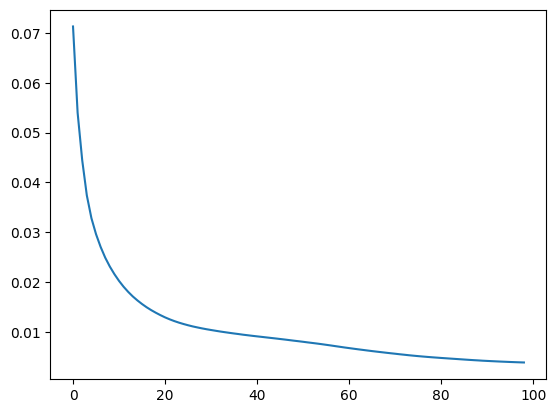

In [88]:
'''visualization-Task2-d'''
trainReconstruct3=Autoencoder3.predict(Input_train_Dataset)
plt.plot(ae3history.history['loss'])

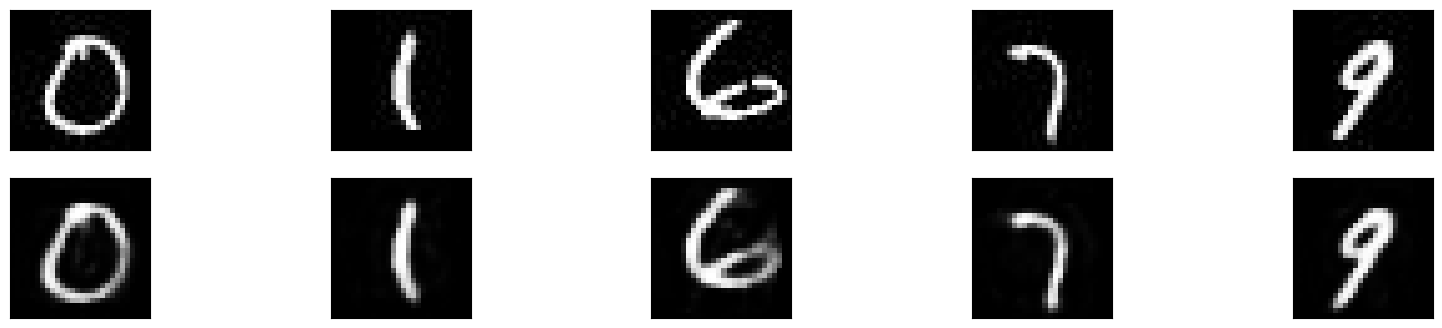

In [89]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

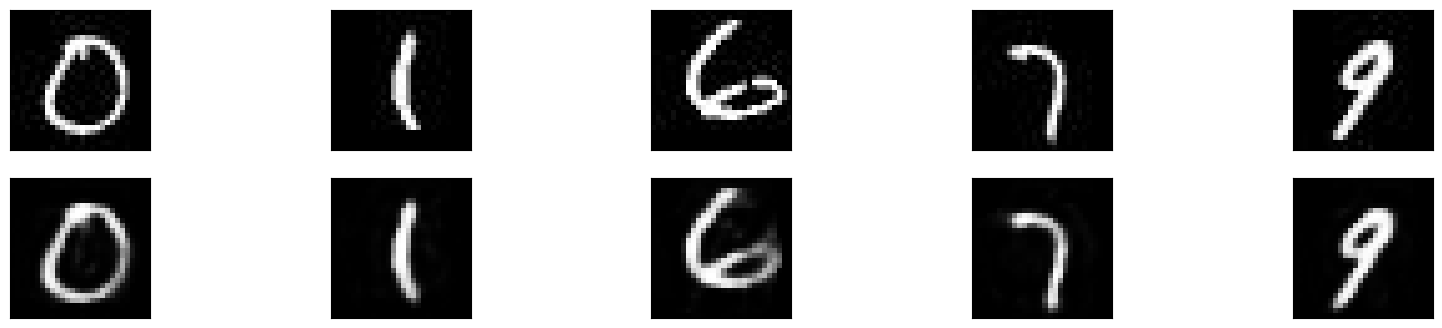

In [112]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

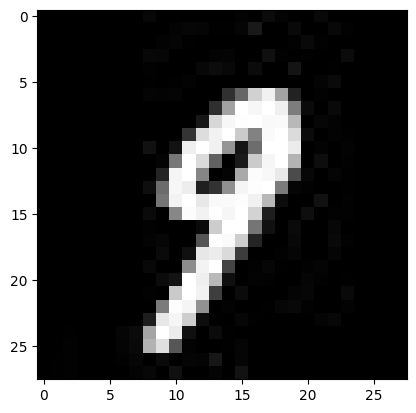

In [90]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

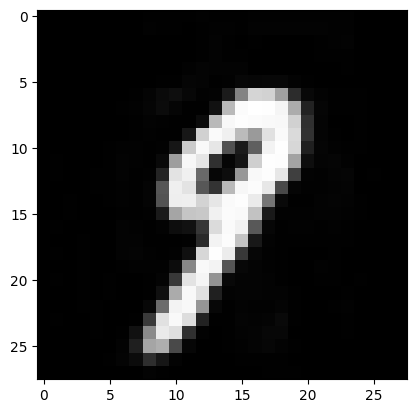

In [91]:
plt.imshow(trainReconstruct3[0].reshape(28,28),cmap='gray')

In [92]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode3=Encoder3.predict(Input_train_Dataset)
valEncode3=Encoder3.predict(Input_val_Dataset)
testEncode3=Encoder3.predict(Input_test_Dataset)

#Fcnn'''
model3 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model3.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit3 = model3.fit(x = trainEncode3, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode3,  Output_val), validation_batch_size=1)

model3.save('/Users/vds/Downloads/modelAssign4/ae64.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae64.pckl','wb')
p.dump(model_fit3.history,f)
f.close()

119/119 [==============================] - 0s 632us/step
Epoch 1/10000
356/356 [==============================] - 12s 33ms/step - loss: 0.7758 - accuracy: 0.6731 - val_loss: 0.2082 - val_accuracy: 0.9325
Epoch 2/10000
356/356 [==============================] - 28s 78ms/step - loss: 0.1696 - accuracy: 0.9436 - val_loss: 0.1279 - val_accuracy: 0.9563
Epoch 3/10000
356/356 [==============================] - 21s 58ms/step - loss: 0.1351 - accuracy: 0.9563 - val_loss: 0.1264 - val_accuracy: 0.9605
Epoch 4/10000
356/356 [==============================] - 15s 43ms/step - loss: 0.1205 - accuracy: 0.9606 - val_loss: 0.1232 - val_accuracy: 0.9602
Epoch 5/10000
356/356 [==============================] - 7s 19ms/step - loss: 0.1178 - accuracy: 0.9634 - val_loss: 0.1207 - val_accuracy: 0.9594
Epoch 6/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1122 - accuracy: 0.9628 - val_loss: 0.1529 - val_accuracy: 0.9505
Epoch 7/10000
356/356 [==============================] - 5s 15m

In [93]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc3=model3.evaluate(x=trainEncode3,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(trainAcc3)

print('\nEvaluation of model on validation data:')
valAcc3=model3.evaluate(x=valEncode3, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(valAcc3)

print('\nEvaluation of model on test data:')
testAcc3=model3.evaluate(x=testEncode3, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(testAcc3)

print('\nPredictions for test data:')
testProb3=model3.predict(testEncode3, batch_size=1, verbose="auto", callbacks=None)
pred3=np.argmax(testProb3,axis=1)
print(pred3)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 808us/step - loss: 0.0641 - accuracy: 0.9788
['loss', 'accuracy']
[0.0641360804438591, 0.9788317680358887]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 774us/step - loss: 0.0772 - accuracy: 0.9723
['loss', 'accuracy']
[0.0771920457482338, 0.9723320007324219]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 768us/step - loss: 0.0853 - accuracy: 0.9726
['loss', 'accuracy']
[0.08534257113933563, 0.9725955128669739]

Predictions for test data:
3795/3795 [==============================] - 3s 670us/step
[4 4 4 ... 1 1 1]


In [94]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix3=tf.math.confusion_matrix(Output_test,pred3)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix3)

tf.Tensor(
[[745   0  10   1   3]
 [  1 755   1   2   0]
 [  4   0 753   0   2]
 [  1   5   3 717  33]
 [  5   4   0  29 721]], shape=(5, 5), dtype=int32)


In [101]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)

In [102]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim3=32

In [103]:
#Autoencoder Arch-1
xInp4=Input(shape=(28,28),name="img")
inp4=Flatten(input_shape=(28, 28), name='InputLayer')(xInp4)

encodedOut4=Dense(encodingDim3,activation='sigmoid')(inp4)

Encoder4=Model(xInp4,encodedOut4,name='encoder')


decodedOut4=Dense(784,activation='sigmoid')(encodedOut4)
out4=Reshape((28,28))(decodedOut4)
optimizer4=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder4=Model(xInp4,out4,name='AutoencoderA1')
Autoencoder4.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder4.compile(optimizer4, loss='mse',metrics=['accuracy'])
ae4history=Autoencoder4.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
 dense_23 (Dense)            (None, 784)               25872     
                                                                 
 reshape_11 (Reshape)        (None, 28, 28)            0         
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [===========================

356/356 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.2515 - val_loss: 0.0273 - val_accuracy: 0.2484
Epoch 51/1000
356/356 [==============================] - 1s 1ms/step - loss: 0.0272 - accuracy: 0.2523 - val_loss: 0.0272 - val_accuracy: 0.2495
Epoch 52/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.2523 - val_loss: 0.0272 - val_accuracy: 0.2493
Epoch 53/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.2527 - val_loss: 0.0271 - val_accuracy: 0.2508
Epoch 54/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.2530 - val_loss: 0.0271 - val_accuracy: 0.2505
Epoch 55/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.2533 - val_loss: 0.0270 - val_accuracy: 0.2510
Epoch 56/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.2533 - val_loss: 0.0270 - val_accuracy: 0.2487

In [104]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr4=Autoencoder4.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr4[0])

#print('\nEvaluation of model on validation data:')
valErr4=Autoencoder4.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr4[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr4=Autoencoder4.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr4[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 771us/step - loss: 0.0262 - accuracy: 0.2572
Train Data: 0.026234282180666924
3795/3795 [==============================] - 3s 770us/step - loss: 0.0264 - accuracy: 0.2528
Validation Data: 0.026392096653580666
3795/3795 [==============================] - 3s 763us/step - loss: 0.0267 - accuracy: 0.2543
Test Data: 0.026747511699795723


356/356 [==============================] - 0s 753us/step


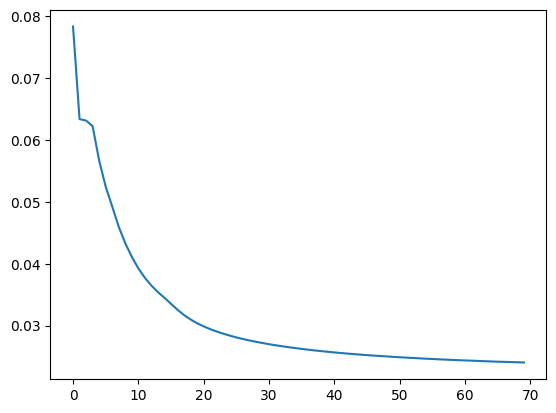

In [105]:
'''visualization-Task2-d'''
trainReconstruct4=Autoencoder4.predict(Input_train_Dataset)
plt.plot(ae3history.history['loss'])

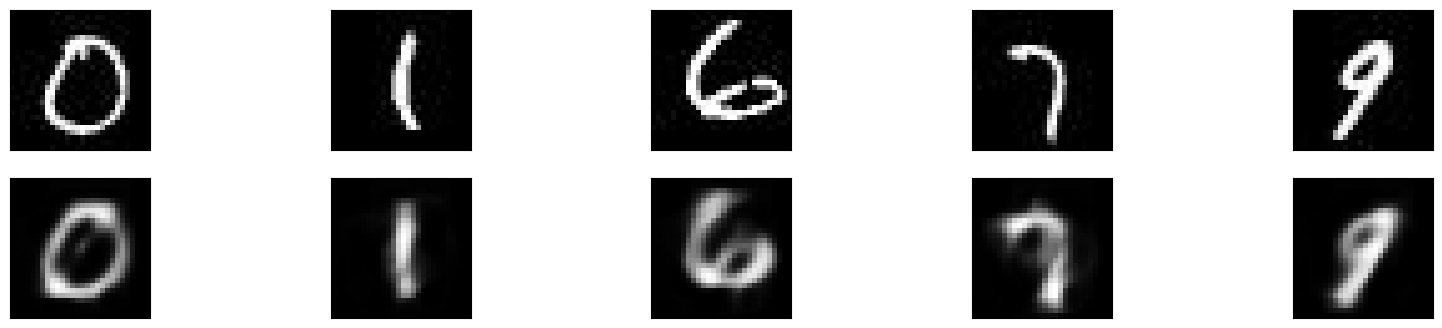

In [106]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

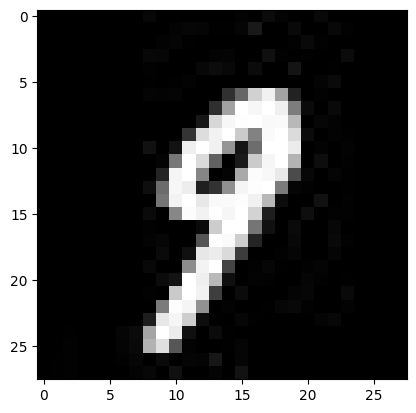

In [107]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

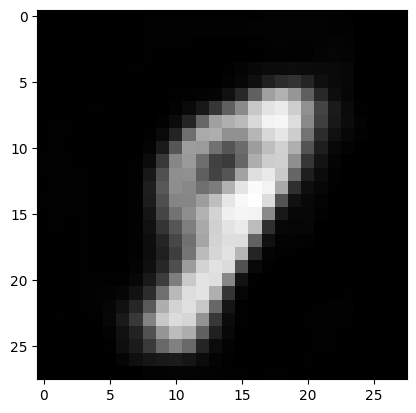

In [108]:
plt.imshow(trainReconstruct4[0].reshape(28,28),cmap='gray')

In [109]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode4=Encoder4.predict(Input_train_Dataset)
valEncode4=Encoder4.predict(Input_val_Dataset)
testEncode4=Encoder4.predict(Input_test_Dataset)

'''Fcnn'''
model4 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model4.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit4 = model4.fit(x = trainEncode4, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode4,  Output_val), validation_batch_size=1)

model4.save('/Users/vds/Downloads/modelAssign4/ae32.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae32.pckl','wb')
p.dump(model_fit4.history,f)
f.close()

119/119 [==============================] - 0s 615us/step
Epoch 1/10000
356/356 [==============================] - 8s 19ms/step - loss: 1.1852 - accuracy: 0.4837 - val_loss: 0.4169 - val_accuracy: 0.8395
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.3244 - accuracy: 0.8826 - val_loss: 0.2489 - val_accuracy: 0.9170
Epoch 3/10000
356/356 [==============================] - 7s 21ms/step - loss: 0.2757 - accuracy: 0.9008 - val_loss: 0.2413 - val_accuracy: 0.9173
Epoch 4/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.2641 - accuracy: 0.9017 - val_loss: 0.2355 - val_accuracy: 0.9194
Epoch 5/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.2608 - accuracy: 0.9072 - val_loss: 0.2505 - val_accuracy: 0.9128
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.2455 - accuracy: 0.9118 - val_loss: 0.2981 - val_accuracy: 0.8951
Epoch 7/10000
356/356 [==============================] - 5s 15ms/st

In [110]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc4=model4.evaluate(x=trainEncode4,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(trainAcc4)

print('\nEvaluation of model on validation data:')
valAcc4=model4.evaluate(x=valEncode4, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(valAcc4)

print('\nEvaluation of model on test data:')
testAcc4=model4.evaluate(x=testEncode4, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(testAcc4)

print('\nPredictions for test data:')
testProb4=model4.predict(testEncode4, batch_size=1, verbose="auto", callbacks=None)
pred4=np.argmax(testProb4,axis=1)
print(pred4)


Evaluation of model on train data:
11385/11385 [==============================] - 11s 941us/step - loss: 0.1741 - accuracy: 0.9361
['loss', 'accuracy']
[0.17413778603076935, 0.9361440539360046]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 838us/step - loss: 0.1923 - accuracy: 0.9373
['loss', 'accuracy']
[0.19234110414981842, 0.9372859001159668]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 787us/step - loss: 0.1977 - accuracy: 0.9339
['loss', 'accuracy']
[0.19766317307949066, 0.9338603615760803]

Predictions for test data:
3795/3795 [==============================] - 3s 729us/step
[4 3 4 ... 1 1 1]


In [111]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix4=tf.math.confusion_matrix(Output_test,pred4)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix4)

tf.Tensor(
[[736   0  12   2   9]
 [  0 742   5   9   3]
 [ 12   4 740   2   1]
 [  1   5   5 717  31]
 [ 10   5   7 128 609]], shape=(5, 5), dtype=int32)
